# Image Search in Large Datasets

With the ever increasing data generated every day, it's important to have efficient ways to search through large image dataset to find the ones you need.

If you only have a CPU only machine and want to search through a large dataset using image as queries, this tutorial is for you.

We will walk you through how to use fastdup to search through thousands of images and find similar looking images to your query image.


> **NOTE**: This is an advanced functionality of fastdup and requires a license key to run. Get yours for free by dropping us an email at info@visual-layer.com .

## Installation & Setting Up

In [1]:
!pip install fastdup -Uqq

In [2]:
import fastdup
fastdup.__version__

'0.926'

## Shoppee Product Match Dataset

In this notebook we will use the a dataset from [Shopee Product Match Kaggle Competition](https://www.kaggle.com/competitions/shopee-product-matching/data). In this competition, participants must determine if two products are the same by their images.

Head to Kaggle and download the dataset into your local directory.

With the dataset downloaded, let's randomly pick a few images and preview them.

In [13]:
sample_images=!find ../../kaggle_datasets/shopee-product-matching/train_images -name '*.jpg'
ret = fastdup.generate_sprite_image(sample_images, 55, ".")[0]

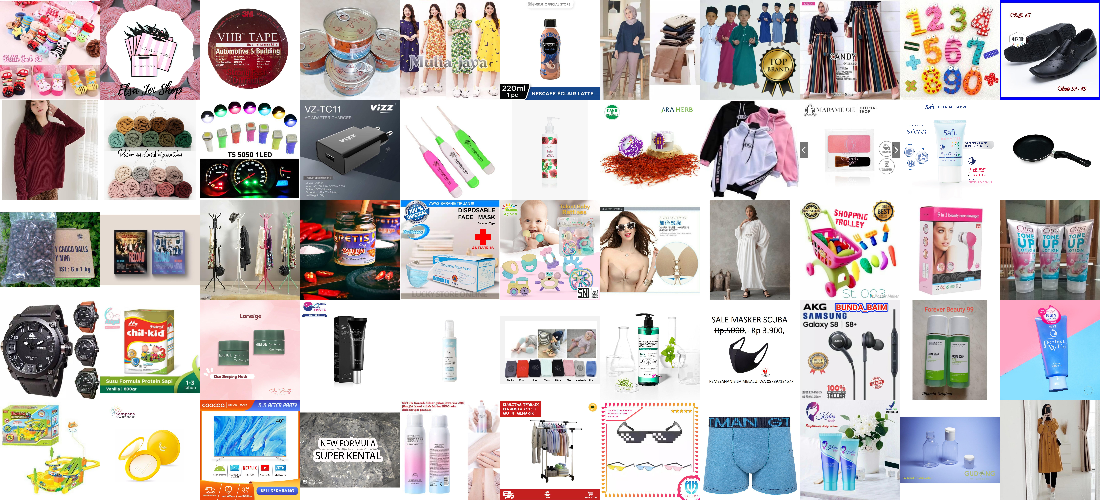

In [14]:
from IPython.display import Image
Image(filename=ret)

## Run fastdup

Point `input_dir` to the location you store the images. `work_dir` is a folder to store all fastdup artifacts generated from the run.

In [15]:
input_dir = "../../kaggle_datasets/shopee-product-matching"
work_dir = "../../kaggle_datasets/my-fastdup-workdir"

In [16]:
fastdup.run(input_dir, work_dir)

FastDup Software, (C) copyright 2022 Dr. Amir Alush and Dr. Danny Bickson.
2023-05-09 09:38:03 [INFO] Going to loop over dir ../../kaggle_datasets/shopee-product-matching
2023-05-09 09:38:03 [WARNING] Found a combination of images and tar files in the input folder. Please remove the tar/zip/tgz files from the input folder
fastdup supports running on webdata format with tar/tgz/zip files but only when there are no images in those input folders
If you want to run only on the tar files and ignore the images please run with turi_param='tar_only=1'
2023-05-09 09:38:03 [INFO] Found total 32415 images to run on, 32415 train, 0 test, name list 32415, counter 32415 
2023-05-09 09:38:47 [INFO] Found total 32415 images to run onimated: 0 Minutes
Finished histogram 24.408
Finished bucket sort 24.490
2023-05-09 09:38:48 [INFO] 917) Finished write_index() NN model
2023-05-09 09:38:48 [INFO] Stored nn model index file ../../kaggle_datasets/my-fastdup-workdir/nnf.index
2023-05-09 09:38:49 [INFO] Total

0

## Restart Runtime

Once the run is complete you can terminate the session and use the generated arfifacts to run an image search.

Let's restart the kernel to simulate a different session.

In [17]:
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

## Initialize Search Parameters

To start searching we must first initialize the search parameters.

The first positional argument is `k` - The number of nearest neighbors to search for. 

In this case we want to search for 10 nearest neighbor. Feel free to experiment with your own number of `k`.

> **NOTE**: This is an advanced functionality of fastdup and requires a license key to run. Get yours for free by dropping us an email at info@visual-layer.com .

In [1]:
import fastdup
input_dir = "../../kaggle_datasets/shopee-product-matching"
work_dir = "../../kaggle_datasets/my-fastdup-workdir"

fastdup.init_search(10, work_dir, license='your_license_key')

2023-05-09 09:39:14 [INFO] 63) Finished load_index() NN model, num_images 32415
2023-05-09 09:39:14 [INFO] Read nnf index file from ../../kaggle_datasets/my-fastdup-workdir/nnf.index 1
2023-05-09 09:39:14 [INFO] Read NNF index with 32415 images


0

## Search with a Query Image

Let's use our own image and find out if there are matches in the shopee dataset.

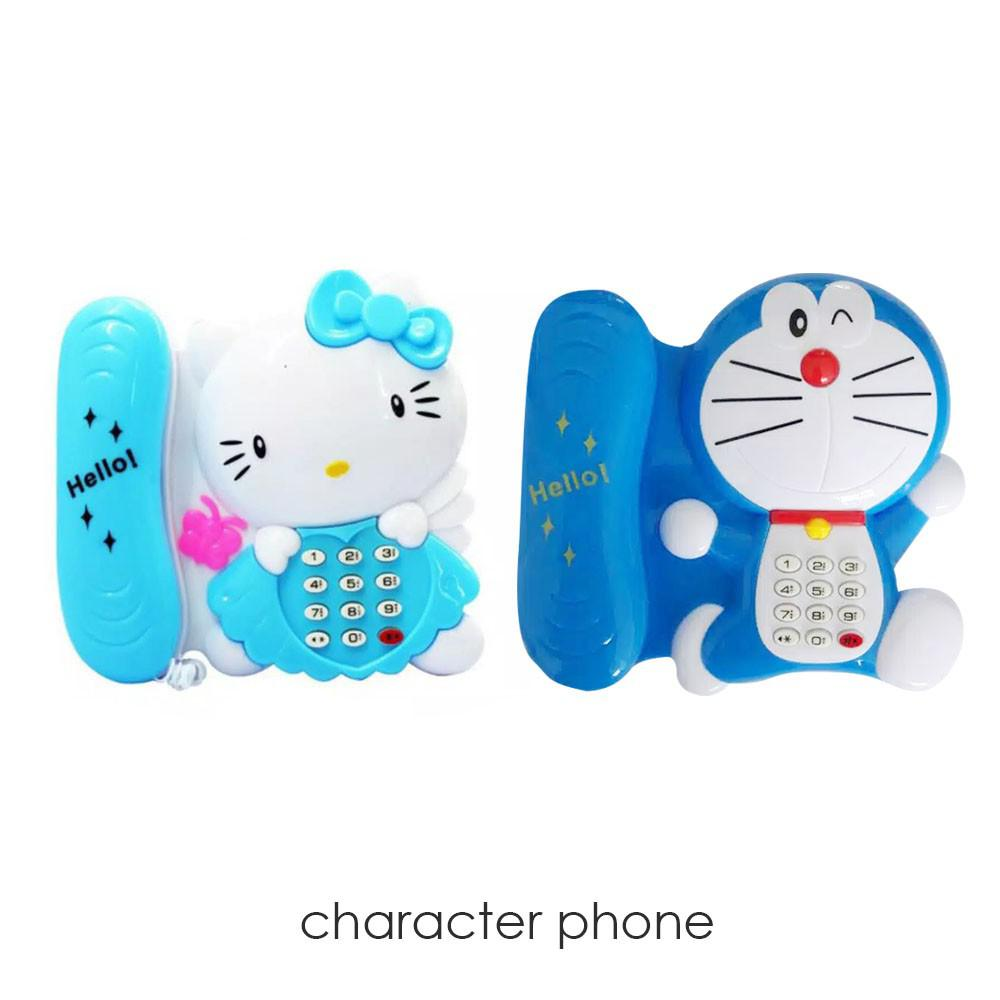

In [4]:
from IPython.display import Image
Image(filename="test_image.jpg")

Specify the query image filename and search for similar images in the images directory.

In [5]:
df = fastdup.search("test_image.jpg")

2023-05-09 09:41:06 [INFO] Total time took 49 ms
2023-05-09 09:41:06 [INFO] Found a total of 1 fully identical images (d>0.990), which are 0.00 %
2023-05-09 09:41:06 [INFO] Found a total of 0 nearly identical images(d>0.980), which are 0.00 %
2023-05-09 09:41:06 [INFO] Found a total of 10 above threshold images (d>0.000), which are 0.00 %
2023-05-09 09:41:06 [INFO] Found a total of 1 outlier images         (d<0.000), which are 0.00 %
2023-05-09 09:41:06 [INFO] Min distance found 0.822 max distance 1.000


Inspect the search result.

The `distance` value indicate how similar is your query image to the other image. 

A `distance` of `1.0` indicates the images are exact duplicates. The lower the value, the less similar the images are.

In [6]:
df

,from,to,distance
0,test_image.jpg,../../kaggle_datasets/shopee-product-matching/test_images/0006c8e5462ae52167402bac1c2e916e.jpg,1.000000
1,test_image.jpg,../../kaggle_datasets/shopee-product-matching/train_images/b1b0ef712ae90ecc8d1ec7bc5d11485a.jpg,0.842375
2,test_image.jpg,../../kaggle_datasets/shopee-product-matching/train_images/182ef6021d6b2118fb9915156cff50e6.jpg,0.841552
3,test_image.jpg,../../kaggle_datasets/shopee-product-matching/train_images/5235cbbdfd70272503647694730424c4.jpg,0.836889
4,test_image.jpg,../../kaggle_datasets/shopee-product-matching/train_images/4cd0ef616259eac109212b2f2e5f7136.jpg,0.830368
5,test_image.jpg,../../kaggle_datasets/shopee-product-matching/train_images/4851da5e4b570ab7147566c85b3fabc2.jpg,0.829968
6,test_image.jpg,../../kaggle_datasets/shopee-product-matching/train_images/c29d3d0821e9e3b0188c005fd95bf424.jpg,0.828526
7,test_image.jpg,../../kaggle_datasets/shopee-product-matching/train_images/086b2dcda1059ba3fd0365a42277b743.jpg,0.828210
8,test_image.jpg,../../kaggle_datasets/shopee-product-matching/train_images/60abf69848da6bc126f31c880a6372ca.jpg,0.825624
9,test_image.jpg,../../kaggle_datasets/shopee-product-matching/train_images/0ae01a272a94a019759bc2a3b4813ee2.jpg,0.822049


You can repeat the search as many times as you wish as long as the model is loaded in memory.

Let's try to search using another query image.

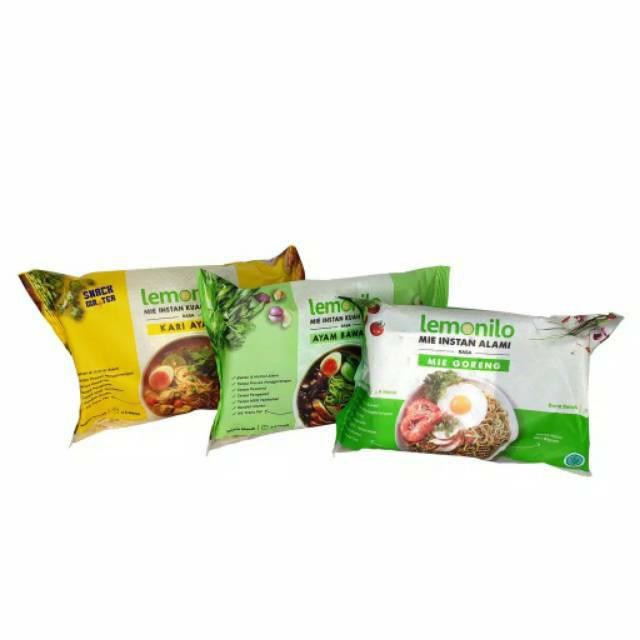

In [8]:
Image(filename="test_image2.jpg")

In [9]:
df2 = fastdup.search("test_image2.jpg")

2023-05-09 09:42:11 [ERROR] Failed assertion pquad_array[absolute_offset*FEATURE_LENGTH] == 0 -0.0004 0.0000 /home/ubuntu/visual_database/cxx/src/inference.hpp:397
2023-05-09 09:42:11 [INFO] Total time took 40 ms
2023-05-09 09:42:11 [INFO] Found a total of 1 fully identical images (d>0.990), which are 0.00 %
2023-05-09 09:42:11 [INFO] Found a total of 0 nearly identical images(d>0.980), which are 0.00 %
2023-05-09 09:42:11 [INFO] Found a total of 10 above threshold images (d>0.000), which are 0.00 %
2023-05-09 09:42:11 [INFO] Found a total of 1 outlier images         (d<0.000), which are 0.00 %
2023-05-09 09:42:11 [INFO] Min distance found 0.822 max distance 1.000


In [13]:
df2

,from,to,distance
0,test_image2.jpg,../../kaggle_datasets/shopee-product-matching/test_images/0006c8e5462ae52167402bac1c2e916e.jpg,1.000000
1,test_image2.jpg,../../kaggle_datasets/shopee-product-matching/train_images/b1b0ef712ae90ecc8d1ec7bc5d11485a.jpg,0.842375
2,test_image2.jpg,../../kaggle_datasets/shopee-product-matching/train_images/182ef6021d6b2118fb9915156cff50e6.jpg,0.841552
3,test_image2.jpg,../../kaggle_datasets/shopee-product-matching/train_images/5235cbbdfd70272503647694730424c4.jpg,0.836889
4,test_image2.jpg,../../kaggle_datasets/shopee-product-matching/train_images/4cd0ef616259eac109212b2f2e5f7136.jpg,0.830368
5,test_image2.jpg,../../kaggle_datasets/shopee-product-matching/train_images/4851da5e4b570ab7147566c85b3fabc2.jpg,0.829968
6,test_image2.jpg,../../kaggle_datasets/shopee-product-matching/train_images/c29d3d0821e9e3b0188c005fd95bf424.jpg,0.828526
7,test_image2.jpg,../../kaggle_datasets/shopee-product-matching/train_images/086b2dcda1059ba3fd0365a42277b743.jpg,0.828210
8,test_image2.jpg,../../kaggle_datasets/shopee-product-matching/train_images/60abf69848da6bc126f31c880a6372ca.jpg,0.825625
9,test_image2.jpg,../../kaggle_datasets/shopee-product-matching/train_images/0ae01a272a94a019759bc2a3b4813ee2.jpg,0.822049


## Visualize Results

This step is optional. fastdup provides a convenient way to visualize your search results for duplicate and similar looking images.

In [14]:
fastdup.create_duplicates_gallery(df, ".", input_dir=input_dir)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 41.40it/s]


Stored similarity visual view in  ./duplicates.html


0


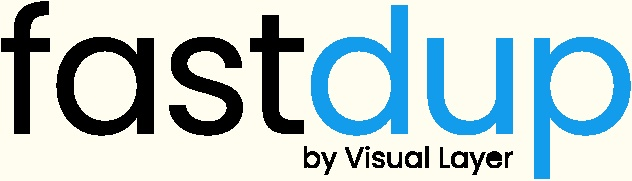
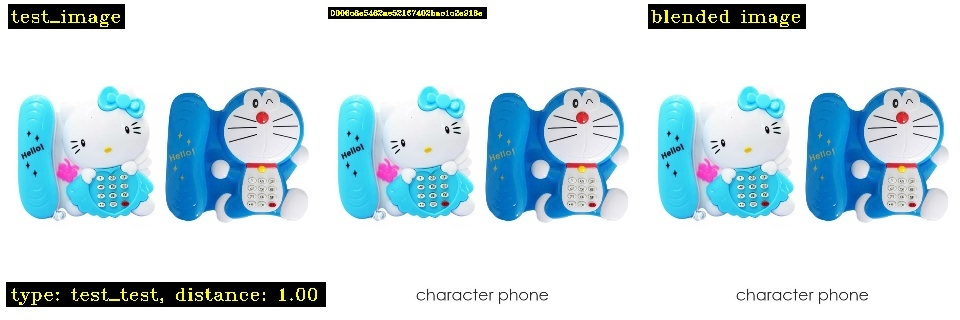
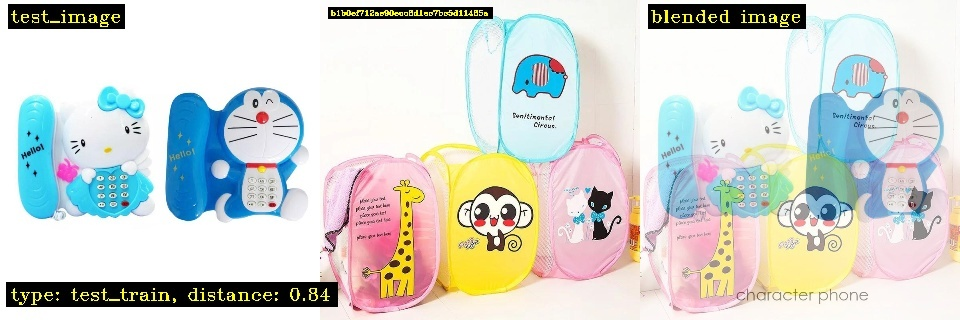
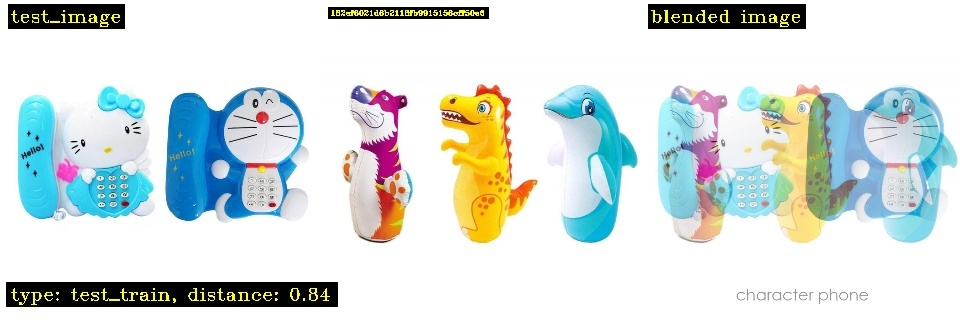
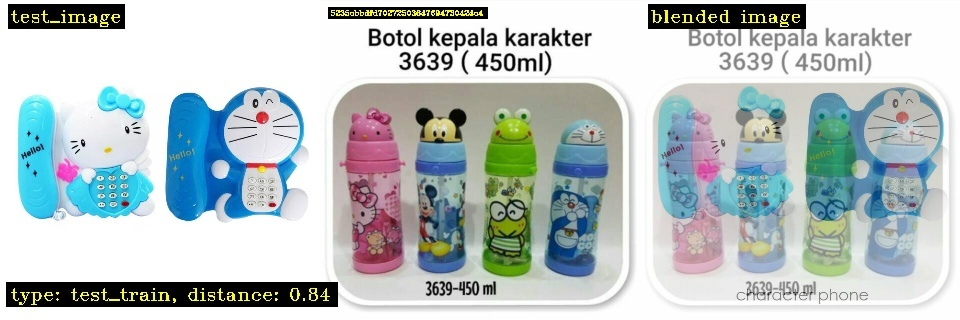
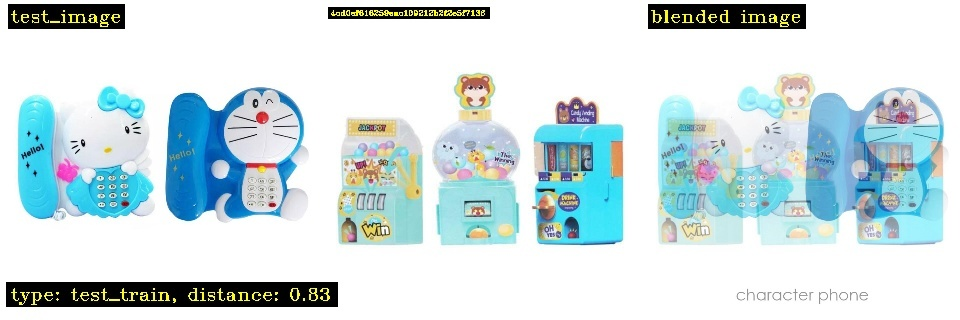
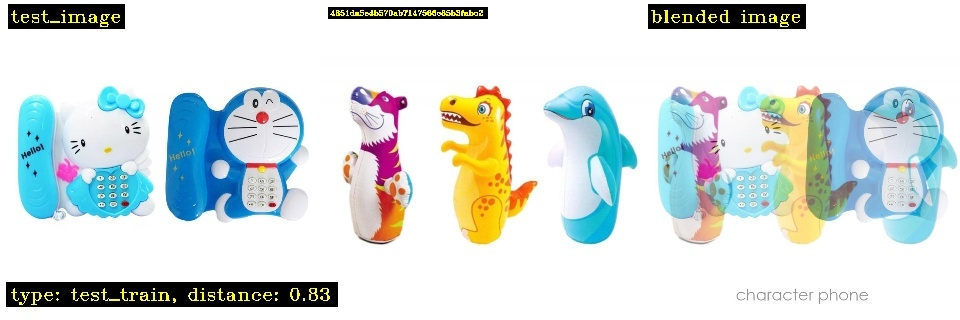
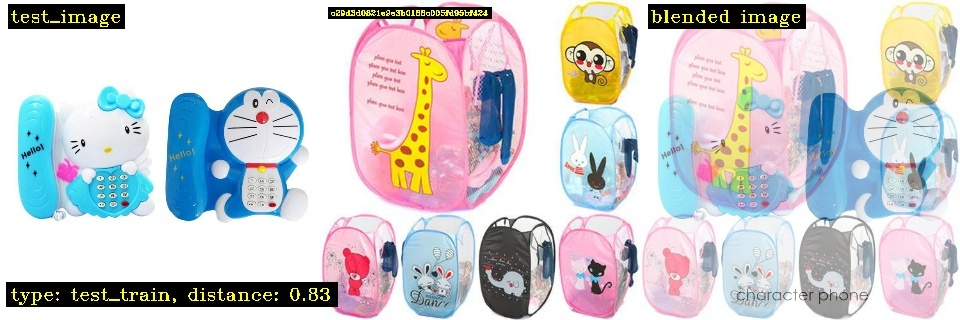
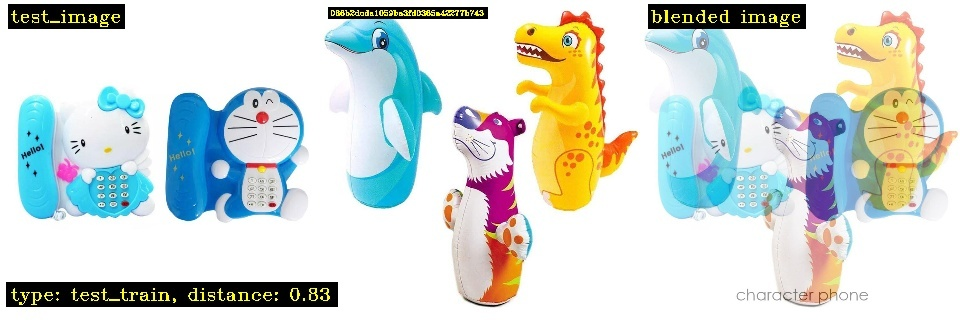
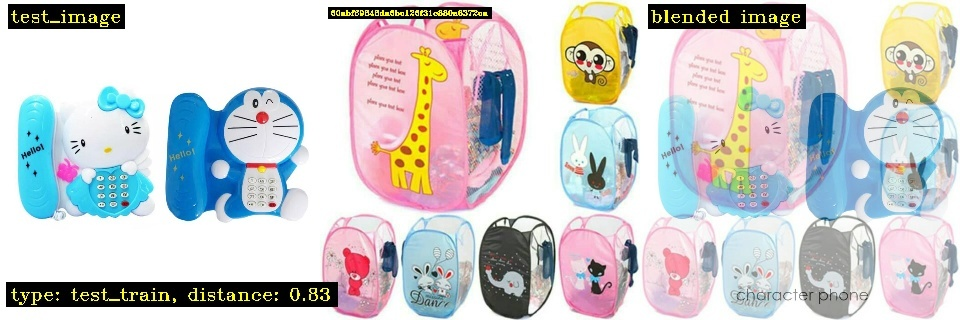
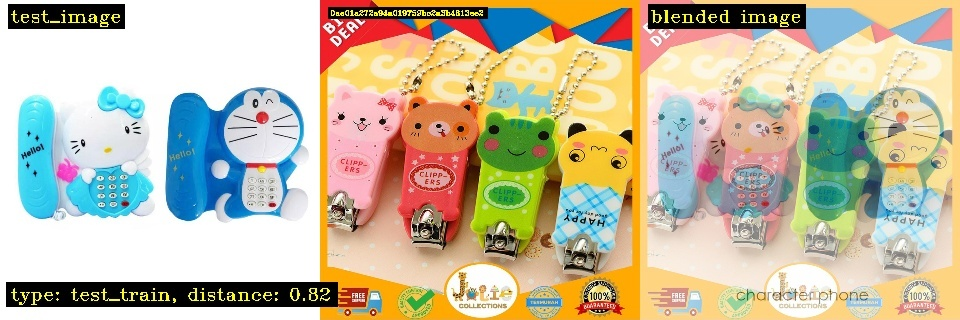

In [15]:
from IPython.display import HTML
HTML(filename="duplicates.html")

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.58it/s]

Stored similar images visual view in  ./similarity.html



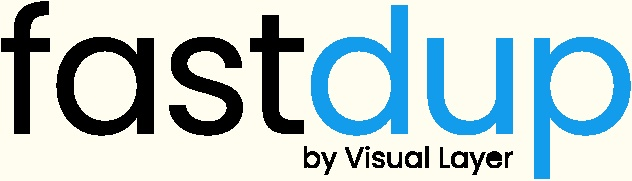
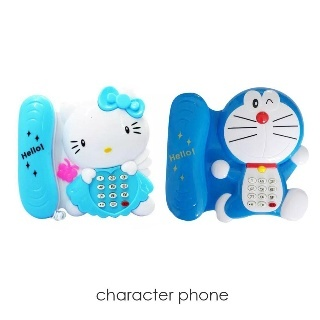
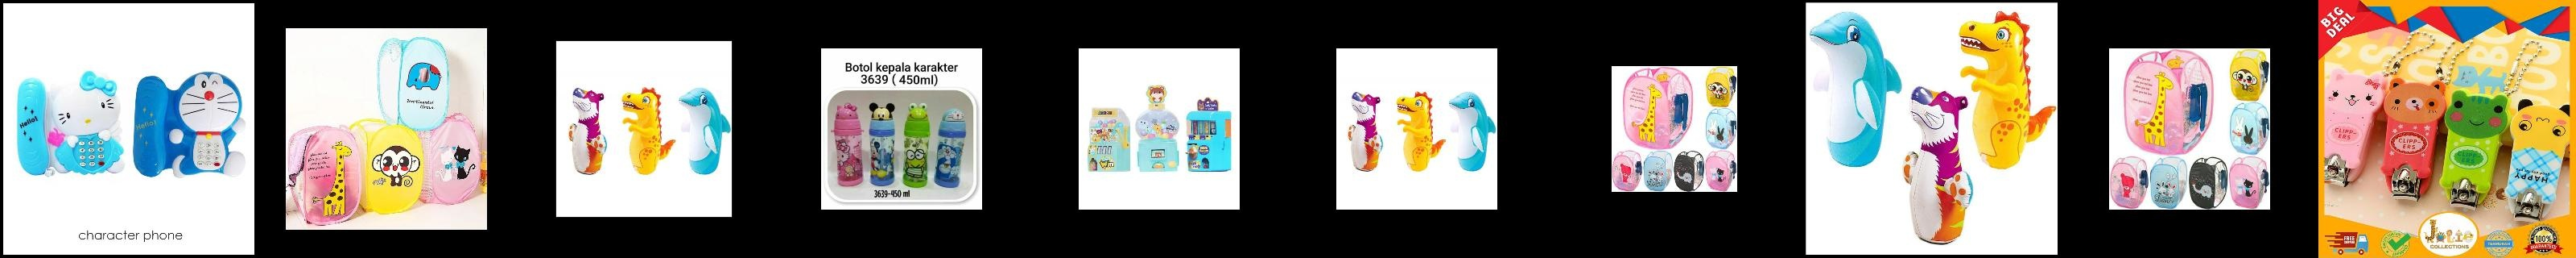

In [16]:
fastdup.create_similarity_gallery(df, ".", input_dir=input_dir, min_items=3)
HTML(filename="similarity.html")

From the Duplicates Report, looks like we found a duplicate product using our test image!

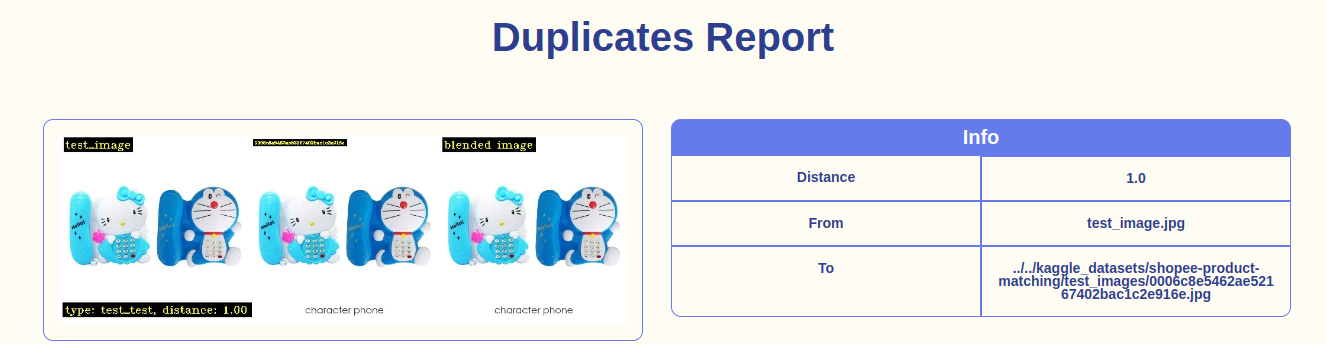

Feel free to repeat the search using other images and visualize them.

## Wrap up
Congratulations! You've made it to the end of the tutorial!

Image similarity search is an incredibly powerful tookit to have in your arsenal as a machine learning practitioner.

For example, if your model is not performing well on a particular category of images, you could use image search to find more examples of that category and add them to your training data.

What next?

We recommend checking out -

- [**Quick Dataset Analysis**](https://nbviewer.org/github/visual-layer/fastdup/blob/main/examples/quick-dataset-analysis.ipynb) - Learn how to quickly analyze a dataset for potential issues. Identify duplicates, outliers, dark/bright/blurry images, and cluster similar images with only a few lines of code.

- [**Cleaning Image Dataset**](https://nbviewer.org/github/visual-layer/fastdup/blob/main/examples/cleaning-image-dataset.ipynb) -  Learn how to clean a dataset from broken images, duplicates, outliers, and identify dark/bright/blurry images.

As usual, feedback is welcome! Drop by our [Slack channel](https://visualdatabase.slack.com/join/shared_invite/zt-19jaydbjn-lNDEDkgvSI1QwbTXSY6dlA#/shared-invite/email) if you have questions!
Happy learning 😀